# Assignment 1

## Task 1

Let's write equations for the explicit and implicit schemes, and for transmissibilities.

Equation for the EXPLICIT scheme:

$$p_{i,j}^{n+1} = p^n_{i,j} + (\frac{\alpha_c B^0 \Delta t}{V_b \phi c}) \cdot q_{sc_i} + (\frac{\alpha_c B^0 \Delta t}{V_b \phi c}) \cdot [T_{x_{i-1/2, j}}^{n} (p_{i-1,j}^{n}) + T_{x_{i+1/2, j}}^{n} p_{i+1,j}^{n} - (T_{x_{i+1/2, j}}^{n} - T_{x_{i-1/2, j}}^{n} +  T_{y_{i, j + 1/2}}^{n} + T_{y_{i, j - 1/2}}^{n}) p_{i,j}^{n} +  T_{y_{i, j + 1/2}}^{n}  p_{i,j+1}^{n} + 
T_{y_{i, j - 1/2}}^{n}  p_{i,j-1}^{n}]$$




Equation for the IMPLICIT scheme:

$$S_{i,j} \cdot p^{n+1}_{i,j-1} + W_{i,j} \cdot p^{n+1}_{i-1,j} + C_{i,j} \cdot p^{n+1}_{i,j} + E{i,j} \cdot p^{n+1}_{i+1,j} + N_{i,j} \cdot p^{n+1}_{i,j+1} = Q_{i,j} $$

With:
$$ S_{i,j} = T_{y_{i,j - 1/2}} $$
$$ W_{i,j} = T_{x_{i - 1/2,j}} $$
$$ C_{i,j} = - [T_{y_{i,j - 1/2}} + T_{x_{i - 1/2,j}} + T_{x_{i + 1/2,j}} + T_{y_{i,j + 1/2}} + (\frac{V_b \phi c}{\alpha_c B^0 \Delta t})_{i,j}  ] $$
$$ E_{i,j} = T_{x_{i + 1/2,j}} $$
$$ N_{i,j} = T_{xy{i,j + 1/2}} $$
$$ Q_{i,j} = - (\frac{V_b \phi c}{\alpha_c B^0 \Delta t}) \cdot p^n_{i,j} - q_{sc_{i}}  $$

Equations for transmissibilities:

$$ Tx_{i+1/2, j} = \frac{2}{(\frac{\Delta x} {\Delta y h k_x})_{i,j} + (\frac{\Delta x} {\Delta y h k_x})_{i+1,j}} \cdot \frac{1}{\mu B}$$
$$ Ty_{i, j+1/2} = \frac{2}{(\frac{\Delta y} {\Delta x h k_y})_{i,j} + (\frac{\Delta y} {\Delta x h k_y})_{i,j+1}} \cdot \frac{1}{\mu B}$$

## Note: 

My convention for the 2D grid block was as follows:

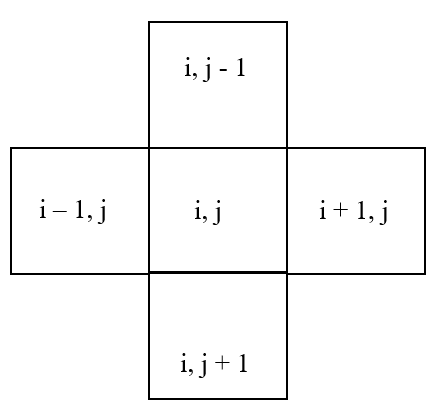

This is done to avoid extra confusion during the calculation with the for loops

Typical convention is something like:


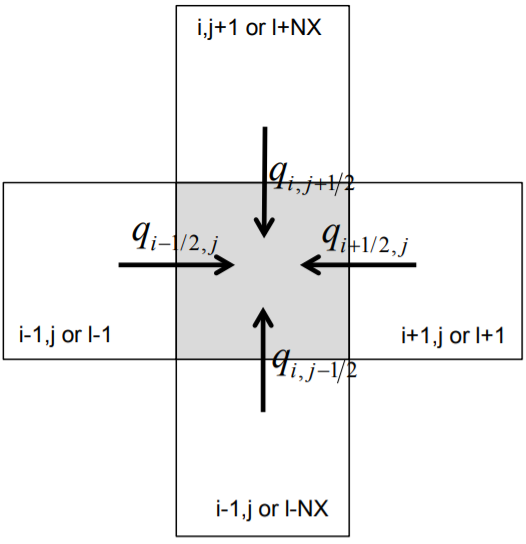

## Task 2

First of all let as import required libraries: 

In [1]:
import numpy as np
from numpy.linalg import solve
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib qt5

Below we will define initial parameters of the grid from pdf file with homework task as numpy ndarrays.

## Initial Conditions

In [2]:
h = np.empty([2, 2])
phi = np.empty([2, 2])
k = np.empty([2, 2])
q = np.empty([2, 2])

h[0, 0] = 20  # m
h[0, 1] = 35  # m
h[1, 0] = 40  # m
h[1, 1] = 50  # m

phi[0, 0] = 0.2
phi[0, 1] = 0.3
phi[1, 0] = 0.1
phi[1, 1] = 0.25

k[0, 0] = 0.02  # D
k[0, 1] = 0.015  # D
k[1, 0] = 0.01  # D
k[1, 1] = 0.07  # D

q[0, 0] = 0  # m3/d
q[0, 1] = 0  # m3/d
q[1, 0] = 5  # m3/d
q[1, 1] = 0  # m3/d

ct = 1e-6  # kPa-1
mu = 2  # mPa*s

p_init = np.zeros([2, 2]) + 30  # MPa

dx = np.empty([2, 2])
dx[0, 0] = 500  # m
dx[0, 1] = 200  # m
dx[1, 0] = 500  # m
dx[1, 1] = 200  # m

dy = np.zeros([2, 2]) + 300  # m

FVF = 1.0

I have decided to convert all metric units to oilfield ones for my convenience. My assumption is permeability in x and y directions are same and Formation Volume Factor (B) is 1 rb/stb

## Initial Units Converted to Field Units

In [3]:
# Field units

def field_units():

    h = np.empty([2, 2])
    phi = np.empty([2, 2])
    k = np.empty([2, 2])
    q = np.empty([2, 2])

    h[0, 0] = 20 * 3.28084  # m -> ft
    h[0, 1] = 35 * 3.28084  # m -> ft
    h[1, 0] = 40 * 3.28084  # m -> ft
    h[1, 1] = 50 * 3.28084  # m -> ft

    phi[0, 0] = 0.2
    phi[0, 1] = 0.3
    phi[1, 0] = 0.1
    phi[1, 1] = 0.25

    k[0, 0] = 0.02  # D
    k[0, 1] = 0.015  # D
    k[1, 0] = 0.01  # D
    k[1, 1] = 0.07  # D

    q[0, 0] = 0  # m^3/d -> stb/d
    q[0, 1] = 0  # m^3/d -> stb/d
    q[1, 0] = -(5 * 6.2898106)  # m^3/d -> stb/d
    q[1, 1] = 0  # m^3/d -> stb/d

    ct = 1e-6 * 6.894757293168362 # kPa-1 -> psi-1
    mu = 2  # cp

    p_init = np.zeros([2, 2]) + 4351.13  # psi

    dx = np.empty([2, 2])
    dx[0, 0] = 500 * 3.28084  # m -> ft
    dx[0, 1] = 200 * 3.28084 # m -> ft
    dx[1, 0] = 500 * 3.28084  # m -> ft
    dx[1, 1] = 200 * 3.28084 # m -> ft

    dy = np.zeros([2, 2]) + (300 * 3.28084) # m -> ft

    # Assumption
    FVF = 1 # FVF-rb/stb
    
    return h, phi, k, q, ct, mu, p_init, dx, dy, FVF

In [4]:
def Transmissibilities():
    h, phi, k, q, ct, mu, p_init, dx, dy, FVF = field_units()
    
    T_x_plus_half = np.empty([2, 2])
    T_x_plus_half[0,0] = ((2)/((dx[0,0]/(dy[0,0] * h[0,0] * k[0,0])) + (dx[0,1]/(dy[0,1] * h[0,1] * k[0,1])))) * (1/ (mu * FVF)) 
    T_x_plus_half[0,1] = 0
    T_x_plus_half[1,0] = ((2)/((dx[1,0]/(dy[1,0] * h[1,0] * k[1,0])) + (dx[1,1]/(dy[1,1] * h[1,1] * k[1,1])))) * (1/ (mu * FVF)) 
    T_x_plus_half[1,1] = 0

    T_x_minus_half = np.empty([2, 2])
    T_x_minus_half[0,0] = 0
    T_x_minus_half[0,1] = ((2)/((dx[0,1]/(dy[0,1] * h[0,1] * k[0,1])) + (dx[0,0]/(dy[0,0] * h[0,0] * k[0,0])))) * (1/ (mu * FVF)) 
    T_x_minus_half[1,0] = 0
    T_x_minus_half[1,1] = ((2)/((dx[1,1]/(dy[1,1] * h[1,1] * k[1,1])) + (dx[1,0]/(dy[1,0] * h[1,0] * k[1,0])))) * (1/ (mu * FVF)) 

    T_y_plus_half = np.empty([2, 2])
    T_y_plus_half[0,0] = ((2)/(((dy[0,0])/(dx[0,0] * h[0,0] * k[0,0])) + ((dy[1,0])/(dx[1,0] * h[1,0] * k[1,0])))) * (1/ (mu * FVF)) 
    T_y_plus_half[1,0] = 0
    T_y_plus_half[0,1] = ((2)/((dy[0,1]/(dx[0,1] * h[0,1] * k[0,1])) + (dy[1,1]/(dx[1,1] * h[1,1] * k[1,1])))) * (1/ (mu * FVF)) 
    T_y_plus_half[1,1] = 0

    T_y_minus_half = np.empty([2, 2])
    T_y_minus_half[0,0] = 0
    T_y_minus_half[1,0] = ((2)/(((dy[0,0])/(dx[0,0] * h[0,0] * k[0,0])) + ((dy[1,0])/(dx[1,0] * h[1,0] * k[1,0])))) * (1/ (mu * FVF)) 
    T_y_minus_half[0,1] = 0
    T_y_minus_half[1,1] = ((2)/((dy[0,1]/(dx[0,1] * h[0,1] * k[0,1])) + (dy[1,1]/(dx[1,1] * h[1,1] * k[1,1])))) * (1/(mu * FVF))

    return T_x_plus_half, T_x_minus_half, T_y_plus_half, T_y_minus_half 
    

In [5]:
import pandas as pd

def calc_pressure_using_explicit_scheme(delta_t,  h, phi, k, q, ct, mu, p_init, dx, dy):
    """
    Computes pressure distribution for the grid from assignment_1.pdf
    using explicit scheme.
    
    Arguments:
    
        delta_t : number -- length of a timestep
        h : ndarray -- block size in Z direction
        phi : ndarray -- porosity
        k : ndarray -- permeability
        q : ndarray -- production rate
        ct : number -- compressibility
        mu : number -- viscosity
        p_init : ndarray -- initial pressure distribution
        dx : ndarray -- block size in X direction
        dy : ndarray -- block size in Y direction
    
    Note: all ndarrays from above are of size [2, 2]
    
    Returns:
        
        p : ndarray of size [n_iterations, 2, 2] -- distribution of the pressure over time.
    
    """
    '''Assumptions: 1) Transmissibilities across same point are same
                    2) Permeability in x and y direction is same
                    3) FVF is 1rb/stb

'''

    h, phi, k, q, ct, mu, p_init, dx, dy, FVF = field_units()


    Vb = dx * dy * h
    alpha = 5.615
    term = (alpha * FVF * delta_t) / (Vb * phi * ct)
#     print('The term is equal to:', term)

    T_x_plus_half, T_x_minus_half, T_y_plus_half, T_y_minus_half = Transmissibilities()


    p_init = np.zeros([2, 2]) + 4351   # psi

    time = np.arange(0, 255, delta_t)

    pressure_array = []
    for num in range(len(time)):
        p_new_arr = []

        #j - row; i - column;
        for j in range(len(p_init)):
            p_new_arr.append([])
            for i in range(len(p_init)):
                # Initially all Pressure plus and minus values and i and j directions are zero
                p_i_plus, p_i_minus, p_j_plus, p_j_minus = 0,0,0,0

                # Simple if statements for this case of 2x2 matrix. Know that it is not very efficient, but it is okay for simple case like this
                
                if (i == 0 and j == 0):
                    p_i_plus = p_init[0][1]

                if (i == 0 and j == 1):
                    p_i_plus = p_init[1][1]

                if (i == 1 and j == 0):
                    p_i_minus = p_init[0][0]

                if (i == 1 and j == 1):
                    p_i_minus = p_init[1][0]

                if (i == 0 and j == 1):
                    p_j_minus = p_init[0][0]
                    
                if (i == 1 and j == 1 ):
                    p_j_minus = p_init[0][1]

                if (i == 0 and j == 0):
                    p_j_plus = p_init[1][0]
                    
                if (i == 1 and j == 0):
                    p_j_plus = p_init[1][1]


                pnew = p_init[j][i] + (term[j][i] * q[j][i]) + (term[j][i] * ((T_x_minus_half[j][i] * p_i_minus) + (T_x_plus_half[j][i] * p_i_plus)  
                            - (((T_x_plus_half[j][i]) + (T_x_minus_half[j][i]) + (T_y_plus_half[j][i]) + (T_y_minus_half[j][i])) * p_init[j][i])
                            + (T_y_minus_half[j][i] * p_j_minus) + (T_y_plus_half[j][i] * p_j_plus)))


                p_new_arr[j].append((pnew))

        p_init = p_new_arr
        pressure_array.append(p_init)

#     If you want to see how the results shown in the dataframe format, uncomment this section    
#     df = pd.DataFrame.from_records(pressure_array)
#     df = pd.DataFrame(np.column_stack([time, df]), columns = ['time', 'row1', 'row2'])
#     return df

    pressure_array = np.array(pressure_array)
    return pressure_array
# pressure_array # psi


    raise NotImplementedError()
    

In [6]:
# Delta t = 5 seconds
delta_t = 5
time = np.arange(0, 255, delta_t)
pressure_array = calc_pressure_using_explicit_scheme(delta_t, h, phi, k, q, ct, mu, p_init, dx, dy)
df = pd.DataFrame.from_records(pressure_array)
df = pd.DataFrame(np.column_stack([time, df]), columns = ['time', 'row1', 'row2'])
df 

The term is equal to: [[0.19217389 0.18302275]
 [0.19217389 0.15373911]]


,time,row1,row2
0,0,"[4351.0, 4351.0]","[4344.956313194011, 4351.0]"
1,5,"[4349.729835048332, 4351.0]","[4341.05733114248, 4350.300368157769]"
2,10,"[4348.054493263718, 4350.731850277855]","[4338.173787289963, 4349.3377729892845]"
3,15,"[4346.288428216794, 4350.1813638567]","[4335.822131026542, 4348.25940918654]"
4,20,"[4344.540268135393, 4349.400145174733]","[4333.777794191852, 4347.114680967475]"
5,25,"[4342.842002127804, 4348.445694918304]","[4331.925879120591, 4345.921614601162]"
6,30,"[4341.197707672532, 4347.365481992795]","[4330.201592944869, 4344.688908518595]"
7,35,"[4339.602020448684, 4346.1950973198145]","[4328.565251272977, 4343.422705315699]"
8,40,"[4338.0471130243195, 4344.960226550726]","[4326.9910138581, 4342.128363188336]"
9,45,"[4336.525258958873, 4343.6791389117625]","[4325.461340606565, 4340.81074921386]"


Also we need a tool for visualisation of results. You can get a gif-like visualization using code below.

Just replace random 'p' variable from below with the distribution computed by you.

In [7]:
# Replace this by your results:
p = pressure_array

fig, ax = plt.subplots()
mat = ax.matshow(p[0])

def update(i):
    label = 'timestep {0}'.format(i)
    mat.set_data(p[i])
    ax.set_xlabel(label)
    return mat, ax

anim = FuncAnimation(fig, update, frames=np.arange(0, p.shape[0]), interval=25)
plt.show()


## Task 3
Equation for Implicit Scheme

$$S_{i,j} \cdot p^{n+1}_{i,j-1} + W_{i,j} \cdot p^{n+1}_{i-1,j} + C_{i,j} \cdot p^{n+1}_{i,j} + E{i,j} \cdot p^{n+1}_{i+1,j} + N_{i,j} \cdot p^{n+1}_{i,j+1} = Q_{i,j} $$

With:
$$ S_{i,j} = T_{y_{i,j - 1/2}} $$
$$ W_{i,j} = T_{x_{i - 1/2,j}} $$
$$ C_{i,j} = - [T_{y_{i,j - 1/2}} + T_{x_{i - 1/2,j}} + T_{x_{i + 1/2,j}} + T_{y_{i,j + 1/2}} + (\frac{V_b \phi c}{\alpha_c B^0 \Delta t})_{i,j}  ] $$
$$ E_{i,j} = T_{x_{i + 1/2,j}} $$
$$ N_{i,j} = T_{xy{i,j + 1/2}} $$
$$ Q_{i,j} = - (\frac{V_b \phi c}{\alpha_c B^0 \Delta t}) \cdot p^n_{i,j} - q_{sc_{i}}  $$


## Matrix Representation

2D Matrix Form (From the Book):
<div>
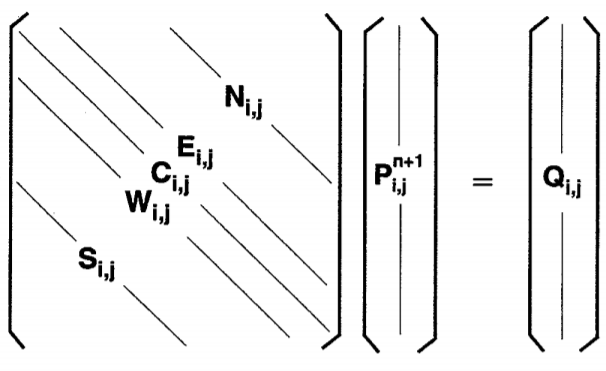
</div>


$$A \cdot X = B$$

Where, $X=\begin{bmatrix} p_{i, j}^{n+1} \\ p_{i, j + 1}^{n+1} \\ p_{i, j + 1}^{n+1} \\ p_{i + 1, j + 1}^{n+1}\end{bmatrix}$, and $B=\begin{bmatrix} -22641.63 \\ -23773.71 \\ -22610.18 \\ -28302.037 \end{bmatrix}$,
and $A = $$\begin{bmatrix} C1 & E1 & N3 & 0\\  W2 & C2  & E2 & N4 \\ S1 & W3 & C3 & E3\\ 0 & S2 & W4 & C4 \end{bmatrix}$


Substituting Coefficients for my case I have the following:

$$ A = \begin{bmatrix} -6.90071688 & 0.60348298 & 1.0936133 & 0.0\\  0.60348298 & -7.0658011  & 0.0 & 0.99851652 \\ 1.09361333 & 0.0 & -7.05021358 & 0.75297967\\ 0.0 & 0.99851652 & 0.75297967 & -8.25602191 \end{bmatrix}$$


In [128]:
def calc_pressure_using_implicit_scheme(
    delta_t, h, phi, k, q, ct, mu, p_init, dx, dy
):
    """
    Computes pressure distribution for the grid from assignment_1.pdf
    using implicit scheme.
    
    Arguments:
    
        delta_t : number -- length of a timestep
        time_horizon : number -- time of the end of simulation
        h : ndarray -- block size in Z direction
        phi : ndarray -- porosity
        k : ndarray -- permeability
        q : ndarray -- production rate
        ct : number -- compressibility
        mu : number -- viscosity
        p_init : ndarray -- initial pressure distribution
        dx : ndarray -- block size in X direction
        dy : ndarray -- block size in Y direction
    
    Note: all ndarrays from above are of size [2, 2]
    
    Returns:
        
        p : ndarray of size [n_iterations, 2, 2] -- distribution of the pressure over time.
    
    """
    
    h, phi, k, q, ct, mu, p_init, dx, dy, FVF = field_units()

    Vb = dx * dy * h
    alpha = 5.615
    term =  (Vb * phi * ct) / (alpha * FVF * delta_t) 
    
#     print('The term is equal to:', term)

    T_x_plus_half, T_x_minus_half, T_y_plus_half, T_y_minus_half = Transmissibilities()

    S_array = []
    W_array = []
    E_array = []
    N_array = []
    C_array = []
    Q_array = []

    pressure_array = []

    for j in range(len(p_init)):

        for i in range(len(p_init)):

            S = T_y_plus_half[j][i]
            W = T_x_minus_half[j][i]
            C = - (T_y_minus_half[j][i] + T_x_minus_half[j][i] + T_y_plus_half[j][i] + T_x_plus_half[j][i] + (term[j][i]) ) 
            E = T_x_plus_half[j][i]
            N = T_y_minus_half[j][i]

            Q = (-(term[j][i] * p_init[j][i]) - q[j][i])


            S_array.append(S)
            W_array.append(W)
            E_array.append(E)
            N_array.append(N)
            C_array.append(C)
            Q_array.append(Q)

#     print('-' * 70)
#     print('Transmissibility Coefficients:')
#     print('C:', C_array)
#     print('W:', W_array)
#     print('N:', N_array)
#     print('S:', S_array)
#     print('E:', E_array)
#     print('Q:', Q_array)
#     print('-' * 70)

    M = np.array([[C_array[0], E_array[0], N_array[2], 0], [W_array[1], C_array[1], E_array[1], N_array[3]],
              [S_array[0], W_array[2], C_array[2], E_array[2]], [0, S_array[1], W_array[3], C_array[3]]])


    time = np.arange(0, 255, delta_t)
    
    B = term * p_init + q

    Y = np.array([[-B[0,0], -B[0,1], -B[1,0], -B[1,1]]]).T # your right hand side
    X =  np.linalg.solve(M, Y)
    pressure_array.append(X)
    
    X = X.reshape(2,2) # Initial Results 

#     print('Pressure Values after {} seconds:\n {}'.format(delta_t, X.reshape(2,2)))
    
    if (delta_t >= 250):
        return X
    
    for i in range(len(time) - 1):
        B = term * X + q
        Y = np.array([[-B[0,0], -B[0,1], -B[1,0], -B[1,1]]]).T
        X = np.linalg.solve(M, Y)
        pressure_array.append(X)
        X = X.reshape(2,2)
        delta_t += delta_t
    
#         print('Pressure Values after {} seconds: {}'.format(delta_t, X.reshape(2,2))) 
    
    for i in range(len(pressure_array)):
        pressure_array[i] = np.array(pressure_array[i]).reshape(2,2)

    return pressure_array 

In [9]:
def pandas_dataframe(delta_t, formulation): 

    if formulation == 'implicit':
        pressure_array = calc_pressure_using_implicit_scheme(delta_t, h, phi, k, q, ct, mu, p_init, dx, dy)
    
    else:
        pressure_array = calc_pressure_using_explicit_scheme(delta_t, h, phi, k, q, ct, mu, p_init, dx, dy)
        
    time = np.arange(0, 255, delta_t)

    df = pd.DataFrame.from_records(pressure_array)
    df = pd.DataFrame(np.column_stack([time, df]), columns = ['time', 'row1', 'row2'])
    
    return df

def dataframe_transformation(df):
    # Converts previous data
    df[['grid1', 'grid2']] = pd.DataFrame(df.row1.to_list(), index = df.index)
    df[['grid3', 'grid4']] = pd.DataFrame(df.row2.to_list(), index = df.index)
    df = df.drop(columns = ['row1', 'row2'])
    
    return df

def plot(df, formulation):
    plt.plot(df.time, df.grid1, linestyle = 'solid', label = 'grid1 ' + formulation)
    plt.plot(df.time, df.grid2, linestyle = 'solid', label = 'grid2 ' + formulation)
    plt.plot(df.time, df.grid3, linestyle = 'solid', label = 'grid3 ' + formulation)
    plt.plot(df.time, df.grid4, linestyle = 'solid', label = 'grid4 ' + formulation)
    plt.ylabel('Pressure (psia)')
    plt.xlabel('Time (seconds)')
    plt.title('2D Finite Difference Method with Explicit and Implicit formulations' )
    plt.show()
    plt.legend()
    

In [20]:
delta_time = 10

df_explicit = pandas_dataframe(delta_time, 'explicit')
df_explicit = dataframe_transformation(df_explicit)
plot(df_explicit, 'explicit')

df_implicit = pandas_dataframe(delta_time, 'implicit')
df_implicit = dataframe_transformation(df_implicit)
plot(df_implicit, 'implicit')


The term is equal to: [[0.38434778 0.3660455 ]
 [0.38434778 0.30747822]]
The term is equal to: [[2.60181029 2.7319008 ]
 [2.60181029 3.25226286]]
----------------------------------------------------------------------
Transmissibility Coefficients:
C: [-4.298906597901656, -4.333900300630759, -4.448403291930614, -5.003759051952944]
W: [0.0, 0.6034829781021898, 0.0, 0.7529796721311475]
N: [0.0, 0.0, 1.0936133333333333, 0.9985165217391303]
S: [1.0936133333333333, 0.9985165217391303, 0.0, 0.0]
E: [0.6034829781021898, 0.0, 0.7529796721311475, 0.0]
Q: [-11320.814791751383, -11886.855531338953, -11289.365738751383, -14151.01848968923]
----------------------------------------------------------------------


In [122]:
p_init

array([[4351.13, 4351.13],
       [4351.13, 4351.13]])

# Task 4 - Stability Analysis

Implicit Formulations are unconditionally stable(can use any $\Delta x$ or $\Delta t$) , but we need to establish a stability analysis criterion for explicit formulations. The stability analysis depends on the size of the grid ($\Delta x$) and time-step size ($\Delta t$). 
I have found the stability equations to be as follows:

$$ \frac{1}{2} (\frac{\phi \mu c}{k})\Delta x^2 $$

$$ \frac{1}{2} (\frac{\phi \mu c}{k})\Delta y^2 $$

In [ ]:
t_y = (1/2) * ((phi * mu * ct)/(k) * dy**2)
t_x = (1/2) * ((phi * mu * ct)/(k) * dx**2)

print('Maximum Time-step for x-axis:', t_x)

print('Maximum Time-step for y-axis', t_y)


Since the reservoir properties are heterogeneous, the maximum time-step for the whole grid should be the minumum value of all the grids. Therefore, the 10.6 seconds should be maximum recommended value for a time-step size

# Task 5 - Material Balance

Вроде где у залежи граница открыта нужно посчитать поток 
это делается через закон Дарси и значения давлений у ячеек на границе
Поток должен равняться суммарному дебиту

In [40]:
h, phi, k, q, ct, mu, p_init, dx, dy, FVF = field_units()

delta_t = 5
pressure_array = calc_pressure_using_explicit_scheme(delta_t, h, phi, k, q, ct, mu, p_init, dx, dy)
pressure_array[-1]

The term is equal to: [[0.19217389 0.18302275]
 [0.19217389 0.15373911]]


array([[4278.51472315, 4286.40715203],
       [4267.47180215, 4283.48635037]])

In [114]:
delta_t = 5
h, phi, k, q, ct, mu, p_init, dx, dy, FVF = field_units()
pressure_array = calc_pressure_using_explicit_scheme(delta_t, h, phi, k, q, ct, mu, p_init, dx, dy)


def Material_Balance_check(pressure_array):

    last_pressure_list = pressure_array[-1]

    potential_graident = ( last_pressure_list[0][0] - last_pressure_list[0][1])/dx[0][0]
    Darcyflow1 = -1.127 * ((h[0][0] * dy[0][0] * k[0][0])/(mu * FVF)) * potential_graident


    potential_graident = ( last_pressure_list[1][1] - last_pressure_list[0][1])/dx[1][1]
    Darcyflow2 = -1.127 * ((h[1][1] * dy[1][1] * k[1][1])/(mu * FVF)) * potential_graident

    MassEntering = Darcyflow1 + Darcyflow2
    
    return MassEntering

MassEntering = Material_Balance_check(pressure_array)

print('The ratio of mass entering and leaving the reservoir:', MassEntering/q[1][0])

The term is equal to: [[0.19217389 0.18302275]
 [0.19217389 0.15373911]]
The ratio of mass entering and leaving the reservoir: -1.0127823767331232
